In [1]:
import cv2
import os
import glob 
from subprocess import check_output as call
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

root_loc = "/home/sashidhar/course-work/cs203/uci.cs203/"

def print_status(in_string):
    print('\n==> Running ', end =" ")
    
    for element in in_string:
        print(element, end =" ")
        
    return 0;

def extract_minutiae(tarp_loc, mindtct_loc, in_img, out_img, out_minutiae):
    img = cv2.imread(in_img,0)
    rows,cols = img.shape
    
    run_tarp = ["java","-jar", tarp_loc, in_img]
    #print_status(run_tarp)
    alignment = call(run_tarp).decode("utf-8").rstrip().split(" ")

    if len(alignment) != 3:
        # This means that the minutiae processing fails. The input image is terrible.
        return 1;

    alignment = [float(alignment[0]), float(alignment[1]), float(alignment[2])]
    angle = 360*(alignment[2]/(2*math.pi))

    M = np.float32([[1, 0, 150 - alignment[0]], [0, 1, 150 - alignment[1]]])
    dst = cv2.warpAffine(img, M, (cols, rows))

    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    dst2 = cv2.warpAffine(dst, M, (cols, rows))
    cv2.imwrite(out_img, dst2)
    
    run_mindtct = [mindtct_loc, out_img, out_minutiae]
    print_status(run_mindtct)
    call(run_mindtct)

    return 0;


In [2]:
files = glob.glob( root_loc + "biohive/src/database/DB4_B/*.tif")
filetrim = root_loc + "biohive/src/database/DB4_B/"
alignedprefix = root_loc + "biohive/src/database/fingerprint_aligned/DB4_B/"
minutiaeprefix = root_loc + "biohive/src/database/minutiae/DB4_B/"
tarp_loc = root_loc + "biohive/src/main/resources/tarp.jar"
mindtct_loc = root_loc + "biohive/src/main/resources/mindtct" 

In [ ]:
i = 0
print("total = %s" % len(files))

for f in files:
    fprefix = f.replace(".tif", "").replace(filetrim, "")
    aligned = alignedprefix + fprefix + ".jpeg"
    minutiae = minutiaeprefix + fprefix
    i = i + 1
    if i % 5 == 0:
        print(i)
    extract_minutiae(tarp_loc, mindtct_loc, f, aligned, minutiae)

In [58]:
files2 = glob.glob(root_loc + "biohive/src/database/minutiae/DB2_B/*.xyt")
files3 = glob.glob(root_loc + "biohive/src/database/minutiae/DB3_B/*.xyt")
files4 = glob.glob(root_loc + "biohive/src/database/minutiae/DB4_B/*.xyt")
files = files2 + files3 + files4
print("total number of fingerprints = %s" % len(files))

x = []
y = []
o = []
for fname in files:
    contents = []
    with open(fname) as f:
        contents = f.readlines()
    for content in contents:
        content = content.rstrip().split(" ")
        if int(content[3]) >= 30:
            x.append(int(content[0]))
            y.append(int(content[1]))
            o.append(int(content[2]))
print("total number of minutiae above 30 percent quality = %s" % len(x))

total number of fingerprints = 235
total number of minutiae above 30 percent quality = 8774


In [59]:
print("x co-ordinate stats:")
print("mean: %s" %int(np.mean(x)))
print("median: %s" %int(np.median(x)))
print("std: %s" %int(np.std(x)))
print("min: %s" %int(np.min(x)))
print("max: %s" %int(np.max(x)))

file = open(root_loc + "biohive/src/main/resources/minutiae_probdist.meta", "w") 
file.write("%s %s %s %s %s\n" %(int(np.mean(x)),int(np.median(x)),int(np.std(x)),int(np.min(x)),int(np.max(x))))

x co-ordinate stats:
mean: 151
median: 153
std: 60
min: 24
max: 279


18

In [60]:
print("y co-ordinate stats:")
print("mean: %s" %int(np.mean(y)))
print("median: %s" %int(np.median(y)))
print("std: %s" %int(np.std(y)))
print("min: %s" %int(np.min(y)))
print("max: %s" %int(np.max(y)))

file.write("%s %s %s %s %s\n" %(int(np.mean(y)),int(np.median(y)),int(np.std(y)),int(np.min(y)),int(np.max(y))))

y co-ordinate stats:
mean: 212
median: 213
std: 98
min: 21
max: 456


18

In [61]:
print("thetha stats:")
print("mean: %s" %int(np.mean(o)))
print("median: %s" %int(np.median(o)))
print("std: %s" %int(np.std(o)))
print("min: %s" %int(np.min(o)))
print("max: %s" %int(np.max(o)))

file.write("%s %s %s %s %s\n" %(int(np.mean(o)),int(np.median(o)),int(np.std(o)),int(np.min(o)),int(np.max(o))))
file.close()

thetha stats:
mean: 174
median: 169
std: 98
min: 0
max: 349


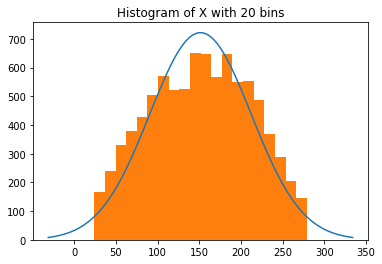

In [62]:
mu = np.mean(x)
sigma = np.std(x)
g = np.linspace(mu - 3*sigma, mu + 3*sigma,100)
plt.plot(g, stats.norm.pdf(g, mu, sigma)*110000)
plt.hist(x, bins=20)
plt.title("Histogram of X with 20 bins")
plt.show()

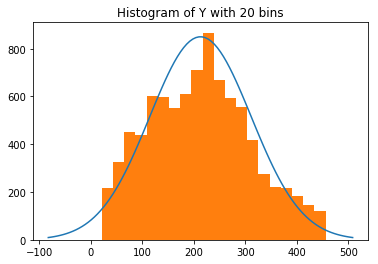

In [63]:
mu = np.mean(y)
sigma = np.std(y)
g = np.linspace(mu - 3*sigma, mu + 3*sigma,100)
plt.plot(g, stats.norm.pdf(g, mu, sigma)*210000)
plt.hist(y, bins=20)
plt.title("Histogram of Y with 20 bins")
plt.show()

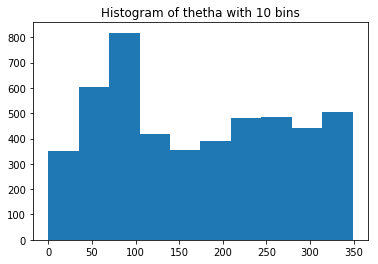

In [57]:
plt.hist(o, bins=10)
plt.title("Histogram of thetha with 10 bins")
plt.show()